In [15]:
import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pipeline import SearchEngine
from relevance import run_relevance_tests

In [16]:
DATA_PATH = '../data/'
RELEVANCE_TEST_PATH = DATA_PATH + 'relevance.test.csv'

In [17]:
search_engine = SearchEngine(max_docs=-1, l2r=False)

Initializing Search Engine...
Loading doc augment dict...


600001it [00:00, 782869.79it/s] 


Loading indexes...


100%|██████████| 200000/200000 [00:22<00:00, 8850.18it/s] 


Loading raw text dict...


9605it [00:00, 980154.01it/s]


Loading ranker...
Search Engine initialized!


In [18]:
overall_scores = []

In [19]:
def log_scores(overall_scores, score, idx):
    for item in score['map_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'map'
        })
    for item in score['ndcg_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'ndcg'
        })
    return overall_scores

In [20]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 0)

100%|██████████| 37/37 [01:37<00:00,  2.64s/it]

MAP:  [0.025, 0.05, 0.18285714285714286, 0, 0, 0.26, 0.01, 0, 0.02, 0, 0.09, 0, 0, 0.0325, 0, 0, 0.03333333333333333, 0, 0.039285714285714285, 0, 0.16666666666666666, 0.11666666666666665, 0, 0, 0.06666666666666667, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0.15, 0]
NDCG:  [0.20934459014771417, 0.1912049197383063, 0.39716165665539105, 0.0, 0.0, 0.35738444023216115, 0.0586666388908508, 0.0, 0.13279625411320248, 0.0, 0.38788542353712996, 0.04541743105845887, 0.0, 0.13628418466142134, 0.0, 0.06617289012360779, 0.16326880032415683, 0.0, 0.2636251908292501, 0.0, 0.3293683421236114, 0.3403003929241778, 0.07119751906546767, 0.07242198498924948, 0.21928535165731325, 0.0, 0.0, 0.0, 0.054633798952207324, 0.0, 0.0, 0.2578062004518628, 0.0, 0.0, 0.17808233551818767, 0.3040695800485996, 0.13058065054168094]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [21]:
search_engine.set_l2r(True)
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 1)

Loading categories...
Loading recognized categories...


100%|██████████| 200000/200000 [00:00<00:00, 639675.95it/s]


Loading network features...


999842it [00:01, 871930.14it/s]


Loading L2R ranker...
Training L2R ranker...
Training model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data points in the train set: 9604, number of used features: 122


100%|██████████| 37/37 [02:29<00:00,  4.03s/it]

MAP:  [0.01, 0, 0.0125, 0.05, 0.05, 0.3, 0.016666666666666666, 0, 0.02, 0, 0.19166666666666665, 0.016666666666666666, 0, 0.01111111111111111, 0, 0.11666666666666665, 0.05, 0.025, 0, 0, 0.2, 0.025, 0, 0, 0.075, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0.03333333333333333]
NDCG:  [0.27954482978104217, 0.02527111695503175, 0.06343775459021642, 0.19031326377064925, 0.4625615171528923, 0.5524908236514924, 0.07539233389643339, 0.0, 0.13279625411320248, 0.0, 0.4532167371076821, 0.08784930351173036, 0.0, 0.06777326424277086, 0.0, 0.5379558393713895, 0.2587749260515187, 0.10623644959942682, 0.0, 0.07072176408952598, 0.43542661591793985, 0.10432711530922105, 0.047465012710311776, 0.04569318514242297, 0.27122780309748196, 0.0, 0.0, 0.19031326377064925, 0.0, 0.0, 0.0, 0.2578062004518628, 0.0, 0.0, 0.43266717964565393, 0.20271305336573306, 0.09605944048975643]


[{'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0.18285714285714286, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.26, 'metric': 'map'},
 {'model': 0, 'score': 0.01, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.09, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.0325, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.03333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.039285714285714285, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1666666666666666

In [28]:
search_engine.set_ranker('VectorRanker')
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 2)

  0%|          | 0/37 [00:05<?, ?it/s]


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, 1, 0.5, 0.5)
log_scores(overall_scores, score, 3)

100%|██████████| 37/37 [04:24<00:00,  7.14s/it]

MAP:  [0, 0, 0, 0, 0, 0.08333333333333333, 0, 0, 0.07222222222222222, 0, 0.01, 0, 0, 0, 0.014285714285714285, 0.21000000000000002, 0.01, 0, 0.03333333333333333, 0, 0.05, 0, 0, 0, 0.07333333333333333, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.016666666666666666, 0]
NDCG:  [0.0, 0.0, 0.0, 0.0, 0.05645572582593928, 0.24921184004556401, 0.0, 0.0, 0.24234862770915105, 0.0, 0.09998021104426177, 0.0, 0.0, 0.0, 0.06024924112532286, 0.6118172234407451, 0.07789901486723573, 0.0, 0.1652385658325726, 0.0, 0.21888665798006005, 0.0, 0.0, 0.0, 0.21595286074639014, 0.0, 0.2392984158430675, 0.0, 0.0, 0.0, 0.0, 0.04656443964250304, 0.0, 0.0, 0.17808233551818767, 0.07842011375761927, 0.0]


[{'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0.05333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.31, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.01111111111111111, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0, '

In [ ]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, mmr_lambda=0.3)
log_scores(overall_scores, score, 4)

100%|██████████| 37/37 [03:23<00:00,  5.49s/it]

MAP:  [0, 0.016666666666666666, 0, 0, 0, 0.05555555555555556, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0, 0.02, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NDCG:  [0.0, 0.07747457209512647, 0.0, 0.0, 0.13297832627282058, 0.18011145091829328, 0.19488635596412884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21483616475251563, 0.0, 0.31689265655728094, 0.0, 0.0, 0.14701095906053588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.382877465348908, 0.0, 0.06342787635877896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1046116933342432, 0.0, 0.01472464406872869]


[{'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0.05333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.31, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.01111111111111111, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0, '

In [ ]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, mmr_lambda=0.5)
log_scores(overall_scores, score, 5)

100%|██████████| 37/37 [03:22<00:00,  5.47s/it]

MAP:  [0, 0.016666666666666666, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0, 0.02, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NDCG:  [0.0, 0.07747457209512647, 0.0, 0.0, 0.13297832627282058, 0.0, 0.19488635596412884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21483616475251563, 0.0, 0.31689265655728094, 0.0, 0.0, 0.14701095906053588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.382877465348908, 0.0, 0.06342787635877896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1046116933342432, 0.0, 0.01472464406872869]


[{'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0.05333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.31, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.01111111111111111, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0, '

In [ ]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline, mmr_lambda=0.7)
log_scores(overall_scores, score, 6)

100%|██████████| 37/37 [03:21<00:00,  5.46s/it]

MAP:  [0, 0.016666666666666666, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0, 0.02, 0, 0.0125, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NDCG:  [0.0, 0.07747457209512647, 0.0, 0.0, 0.13173002692719166, 0.0, 0.19488635596412884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21483616475251563, 0.0, 0.31689265655728094, 0.0, 0.0, 0.14701095906053588, 0.0, 0.07296221932668669, 0.0, 0.0, 0.0, 0.0, 0.0, 0.382877465348908, 0.0, 0.12685575271755792, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1046116933342432, 0.0, 0.011458000193535331]


[{'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0.05333333333333333, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.31, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.02, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.01111111111111111, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.05, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.1, 'metric': 'map'},
 {'model': 0, 'score': 0, '

In [ ]:
overall_scores = pd.DataFrame(overall_scores)
overall_scores

,model,score,metric
0,0,0.000000,map
1,0,0.100000,map
2,0,0.053333,map
3,0,0.000000,map
4,0,0.000000,map
...,...,...,...
513,6,0.000000,ndcg
514,6,0.000000,ndcg
515,6,0.104612,ndcg
516,6,0.000000,ndcg


/tmp/ipykernel_10558/720272392.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(models_list, rotation=45)


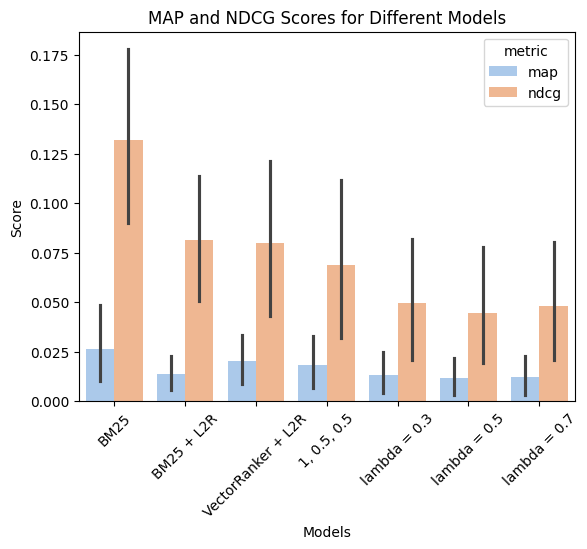

In [ ]:
plot = sns.barplot(x='model', y='score', hue='metric',
                   data=overall_scores, palette='pastel')
models_list = ['BM25', 'BM25 + L2R', 'VectorRanker + L2R', '1, 0.5, 0.5',
               'lambda = 0.3', 'lambda = 0.5', 'lambda = 0.7']
plot.set_xticklabels(models_list, rotation=45)
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plot.set_title('MAP and NDCG Scores for Different Models')
plt.show()